In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np

In [2]:
#load the train dataset
df_train = pd.read_csv("train_v9rqX0R.csv")
df_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


# Preprocessing of train dataset

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [4]:
df_train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [5]:
df_train.duplicated().sum()

0

In [6]:
df_train.shape

(8523, 12)

In [7]:
df_train['Item_Weight'].value_counts()

12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: Item_Weight, Length: 415, dtype: int64

In [8]:
df_train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

<AxesSubplot:>

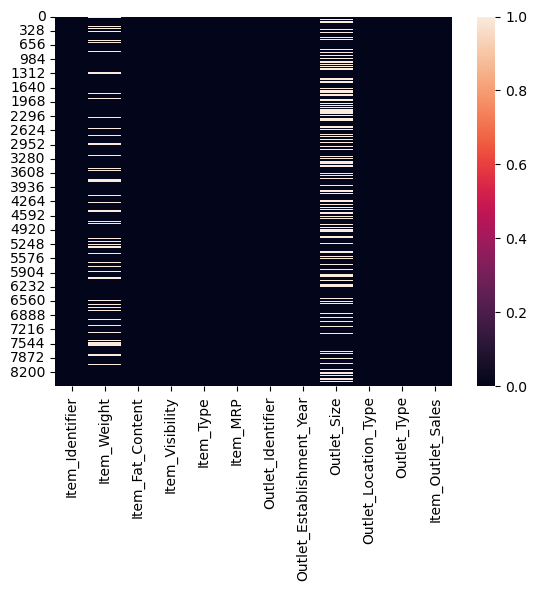

In [9]:
import seaborn as sns
sns.heatmap(df_train.isnull())

<AxesSubplot:>

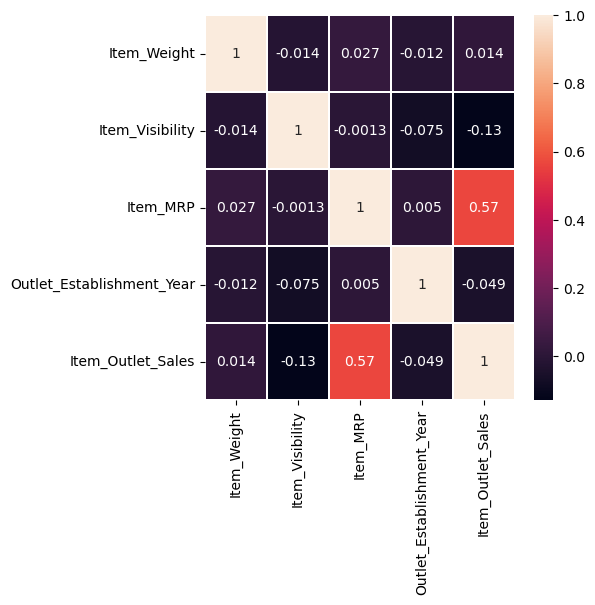

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
sns.heatmap(df_train.corr(), annot=True, linewidths=0.1)

In [11]:
df_train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [12]:
df_train['Item_Weight']=df_train['Item_Weight'].fillna(df_train['Item_Weight'].median())

In [13]:
df_train['Outlet_Size'] = df_train['Outlet_Size'].fillna(df_train.groupby('Outlet_Size')['Item_Identifier'].count().idxmax())

In [14]:
df_train.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [15]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
columns = ['Outlet_Type','Outlet_Location_Type','Outlet_Size','Outlet_Identifier','Item_Type','Item_Fat_Content','Item_Identifier']
for column in columns:
  df_train[column] = encoder.fit_transform(df_train[column])

In [16]:
y=df_train['Item_Outlet_Sales']
x=df_train.drop(['Item_Outlet_Sales'],axis=1)

In [17]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x,y)

RandomForestRegressor()

In [18]:
#load the test dataset
df_test = pd.read_csv("test_AbJTz2l.csv")
df_test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [19]:
df_test.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [20]:
encoder = LabelEncoder()
columns = ['Outlet_Type','Outlet_Location_Type','Outlet_Size','Outlet_Identifier','Item_Type','Item_Fat_Content','Item_Identifier']
for column in columns:
  df_test[column] = encoder.fit_transform(df_test[column])

In [21]:
df_test['Item_Weight'] = df_test['Item_Weight'].fillna(df_test['Item_Weight'].median())
df_test['Outlet_Size'] = df_test['Outlet_Size'].fillna(df_test.groupby('Outlet_Size')['Item_Identifier'].count().idxmax())


In [22]:
df_test.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [23]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   int32  
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   int32  
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   int32  
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   int32  
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   int32  
 9   Outlet_Location_Type       8523 non-null   int32  
 10  Outlet_Type                8523 non-null   int32  
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int32(7), int64(1)
memory usage: 566.1 KB


In [24]:
y_pred = model.predict(df_test)

In [25]:
pred_data = pd.DataFrame(y_pred)
pred_data.to_csv('test.csv',index=False)

In [26]:
pred_data.head(10)

,0
0,1580.602542
1,1346.800214
2,807.542162
3,2661.162652
4,6021.521832
5,1872.902058
6,676.099926
7,1906.691408
8,1017.129344
9,3091.036422


In [27]:
df_train['Item_Identifier']

0        156
1          8
2        662
3       1121
4       1297
        ... 
8518     370
8519     897
8520    1357
8521     681
8522      50
Name: Item_Identifier, Length: 8523, dtype: int32

In [28]:
df = pd.read_csv("test_AbJTz2l.csv")

In [29]:
df['Item_Identifier']

0       FDW58
1       FDW14
2       NCN55
3       FDQ58
4       FDY38
        ...  
5676    FDB58
5677    FDD47
5678    NCO17
5679    FDJ26
5680    FDU37
Name: Item_Identifier, Length: 5681, dtype: object

In [30]:
pred_data['Item_Identifier'] = df['Item_Identifier']
pred_data['Outlet_Identifier'] = df['Outlet_Identifier']
pred_data =  pred_data.rename(columns={0: 'Item_Outlet_Sales'})
pred_data = pred_data[['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales']]

In [31]:
pred_data.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1580.602542
1,FDW14,OUT017,1346.800214
2,NCN55,OUT010,807.542162
3,FDQ58,OUT017,2661.162652
4,FDY38,OUT027,6021.521832


In [32]:
pred_data.to_csv('test_out.csv',index=False)

In [33]:
pred_data.columns

Index(['Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales'], dtype='object')